In [42]:
import pandas as pd

#제품데이터 불러오기
book_data= pd.read_csv("../data/book/books.csv", low_memory = False) # csv 파일이 커서 low_memory는 False로 설정함.  
                                                                      # book_data는 해당 알고리즘에서 굳이 필요없을 것 같다는 판단.                     
#유저데이터 불러오기                                                 
user_data = pd.read_csv("../data/book/Users.csv")

#별점 데이터 불러오기
rating_data = pd.read_csv("../data/book/Ratings.csv")

In [43]:
book_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [44]:
# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = book_data['Book-Title'].unique()
string_to_int_mapping = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
book_data['Book-Title_encoded'] = book_data['Book-Title'].map(string_to_int_mapping)

# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = book_data['Book-Author'].unique()
string_to_int_mapping = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
book_data['Book-Author_encoded'] = book_data['Book-Author'].map(string_to_int_mapping)

# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = book_data['Publisher'].unique()
string_to_int_mapping = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
book_data['Publisher_encoded'] = book_data['Publisher'].map(string_to_int_mapping)


In [45]:
book_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Title_encoded,Book-Author_encoded,Publisher_encoded
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0,0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,1,1,1
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2,2,2
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,3,3,3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,19469,377,1460
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,242131,102021,140
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,242132,17770,303
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,242133,832,0


In [200]:
y_book_title = book_data['Book-Title_encoded']
y_book_Author = book_data['Book-Author_encoded']
y_book_Publisher = book_data['Publisher_encoded']

<Axes: >

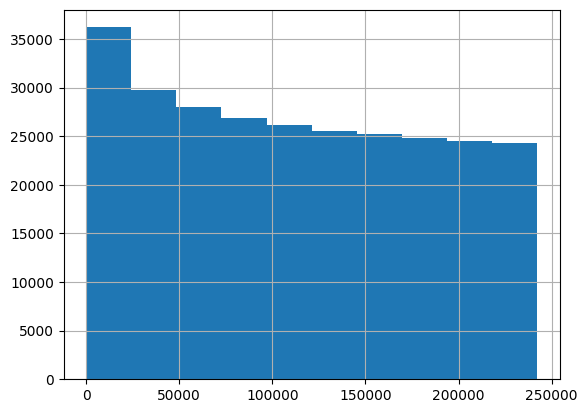

In [203]:
y_book_title.hist()

<Axes: >

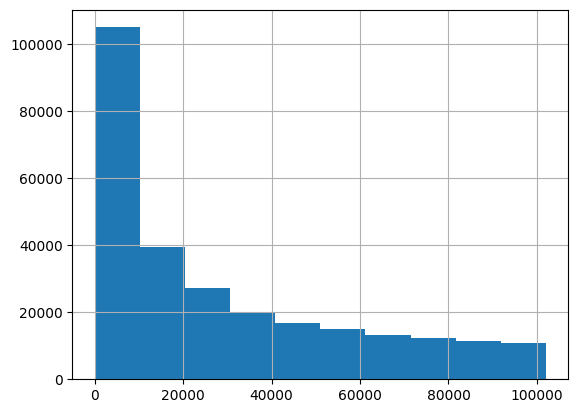

In [204]:
y_book_Author.hist()

<Axes: >

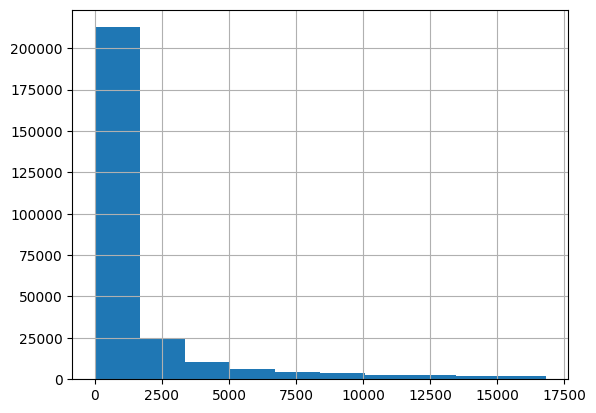

In [205]:
y_book_Publisher.hist()

In [206]:
y_all = y_book_title + y_book_Author + y_book_Publisher

<Axes: >

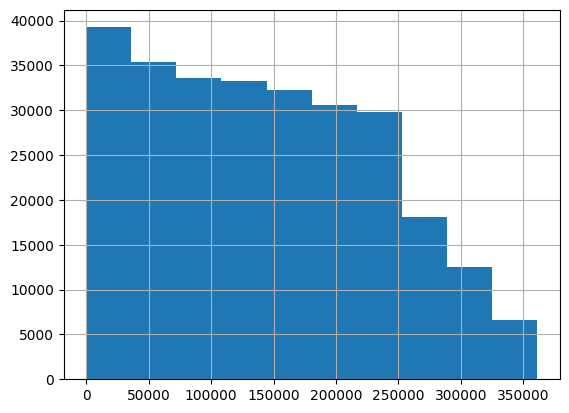

In [207]:
y_all.hist()

In [48]:
string_to_int_mapping_book_data = string_to_int_mapping.copy()

In [49]:
user_data

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [50]:
# age 칼럼 삭제
user_data2 = user_data.drop(columns = ['Age'])
user_data2

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"
...,...,...
278853,278854,"portland, oregon, usa"
278854,278855,"tacoma, washington, united kingdom"
278855,278856,"brampton, ontario, canada"
278856,278857,"knoxville, tennessee, usa"


In [51]:
rating_data

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [52]:
rating_data2 = rating_data.drop(columns = ['ISBN'])
rating_data2

rating_data3 = rating_data2[(rating_data2['Book-Rating'] != 0)]
print(rating_data3)

         User-ID  Book-Rating
1         276726            5
3         276729            3
4         276729            6
6         276736            8
7         276737            6
...          ...          ...
1149773   276704            5
1149775   276704            9
1149777   276709           10
1149778   276721           10
1149779   276723            8

[433671 rows x 2 columns]


In [53]:
# user_data 중 rating_data에 있는 유저들만 빼내어 unique_user 데이터에 할당 

In [54]:
user_ids_rating = rating_data2['User-ID'].tolist()
unique_user = user_data2[user_data2['User-ID'].isin(user_ids_rating)]

In [55]:
unique_user

,User-ID,Location
1,2,"stockton, california, usa"
6,7,"washington, dc, usa"
7,8,"timmins, ontario, canada"
8,9,"germantown, tennessee, usa"
9,10,"albacete, wisconsin, spain"
...,...,...
278845,278846,"toronto, ontario, canada"
278848,278849,"georgetown, ontario, canada"
278850,278851,"dallas, texas, usa"
278851,278852,"brisbane, queensland, australia"


In [56]:
# Spliting the columns 'Location' to create the columns 'City', 'State' and 'Country' 

spliting = unique_user['Location'].str.split(pat=',',expand=True)
unique_user['City'] = spliting[0].str.strip()
unique_user['State'] = spliting[1].str.strip()
unique_user['Country'] = spliting[2].str.strip()

unique_user

/var/folders/hy/_k7gcypd00s_2mmm5h2jktx00000gn/T/ipykernel_1657/3778636167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_user['City'] = spliting[0].str.strip()
/var/folders/hy/_k7gcypd00s_2mmm5h2jktx00000gn/T/ipykernel_1657/3778636167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_user['State'] = spliting[1].str.strip()
/var/folders/hy/_k7gcypd00s_2mmm5h2jktx00000gn/T/ipykernel_1657/3778636167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,User-ID,Location,City,State,Country
1,2,"stockton, california, usa",stockton,california,usa
6,7,"washington, dc, usa",washington,dc,usa
7,8,"timmins, ontario, canada",timmins,ontario,canada
8,9,"germantown, tennessee, usa",germantown,tennessee,usa
9,10,"albacete, wisconsin, spain",albacete,wisconsin,spain
...,...,...,...,...,...
278845,278846,"toronto, ontario, canada",toronto,ontario,canada
278848,278849,"georgetown, ontario, canada",georgetown,ontario,canada
278850,278851,"dallas, texas, usa",dallas,texas,usa
278851,278852,"brisbane, queensland, australia",brisbane,queensland,australia


In [57]:
unique_user= unique_user.drop('Location', axis=1)

In [58]:
# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = unique_user['City'].unique()
string_to_int_mapping = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
unique_user['City_encoded'] = unique_user['City'].map(string_to_int_mapping)

# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = unique_user['State'].unique()
string_to_int_mapping = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
unique_user['State_encoded'] = unique_user['State'].map(string_to_int_mapping)
# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = unique_user['Country'].unique()
string_to_int_mapping = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
unique_user['Country_encoded'] = unique_user['Country'].map(string_to_int_mapping)

# 결과 출력
print(unique_user)

        User-ID        City       State    Country  City_encoded  \
1             2    stockton  california        usa             0   
6             7  washington          dc        usa             1   
7             8     timmins     ontario     canada             2   
8             9  germantown   tennessee        usa             3   
9            10    albacete   wisconsin      spain             4   
...         ...         ...         ...        ...           ...   
278845   278846     toronto     ontario     canada           180   
278848   278849  georgetown     ontario     canada          1022   
278850   278851      dallas       texas        usa           105   
278851   278852    brisbane  queensland  australia           255   
278853   278854    portland      oregon        usa            14   

        State_encoded  Country_encoded  
1                   0                0  
6                   1                0  
7                   2                1  
8                  

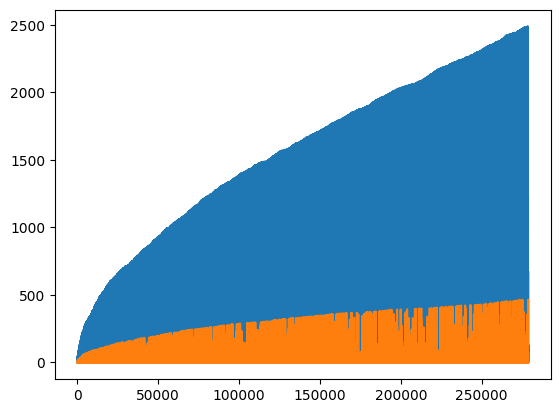

In [119]:
plt.plot(unique_user[['State_encoded','Country_encoded']])

In [123]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = unique_user[['State_encoded','Country_encoded','City_encoded']]
#y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['State_encoded','Country_encoded','City_encoded']
scaling_encode_data = pd.DataFrame(x, columns=features)

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

In [130]:
principalDf

,principal component1,principal component2
0,-0.708531,0.500029
1,-0.705899,0.500436
2,-0.678079,0.518376
3,-0.700636,0.501248
4,-0.647628,0.536722
...,...,...
105278,-0.658428,0.477363
105279,-0.565471,0.283361
105280,-0.638952,0.490480
105281,-0.277181,0.632478


In [131]:
pca.explained_variance_ratio_

array([0.48165047, 0.30426857])

In [132]:
scaling_encode_data

,State_encoded,Country_encoded,City_encoded
0,-0.388557,-0.219561,-0.743566
1,-0.384741,-0.219561,-0.743306
2,-0.380924,-0.178867,-0.743046
3,-0.377107,-0.219561,-0.742787
4,-0.373290,-0.138173,-0.742527
...,...,...,...
105278,-0.380924,-0.178867,-0.696802
105279,-0.380924,-0.178867,-0.478051
105280,-0.300770,-0.219561,-0.716287
105281,-0.083209,0.105991,-0.677317


In [133]:
from scipy import stats

In [134]:
shapiro_test = stats.shapiro(x)

/Users/sonhyeongjin/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [137]:
shapiro_test

ShapiroResult(statistic=0.4992688298225403, pvalue=0.0)

In [173]:
import numpy as np
from scipy.stats import normaltest

    nn_test = stats.normaltest(x)
    nn_test

NormaltestResult(statistic=24353.727585866523, pvalue=0.0)

In [142]:
scaling_encode_data.iloc[:,0]

0        -0.388557
1        -0.384741
2        -0.380924
3        -0.377107
4        -0.373290
            ...   
105278   -0.380924
105279   -0.380924
105280   -0.300770
105281   -0.083209
105282   -0.342755
Name: State_encoded, Length: 105283, dtype: float64

In [145]:
# 라이브러리 호출
import numpy as np
from scipy.stats import normaltest

# 정규분포를 따르도록 랜덤하게 값을 부여
np.random.seed(0)
n = 10000
x = np.random.normal(0, 500, n)

nn_test = stats.normaltest(x)
nn_test

NormaltestResult(statistic=1.5506704169544296, pvalue=0.46054937506662497)

In [180]:
x_1 = unique_user['State_encoded']
x_2 = unique_user['Country_encoded']
x_3 = unique_user['City_encoded']

<Axes: >

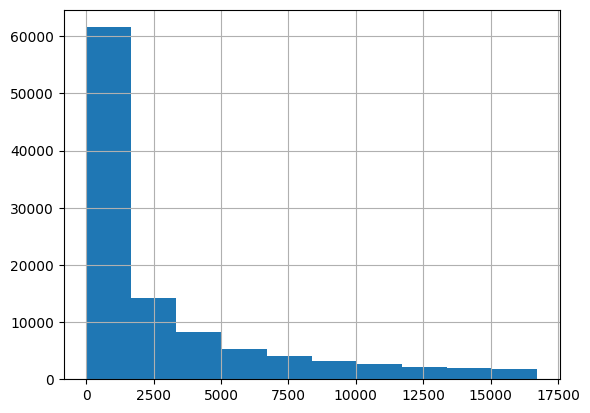

In [182]:
x_3.hist()

<Axes: >

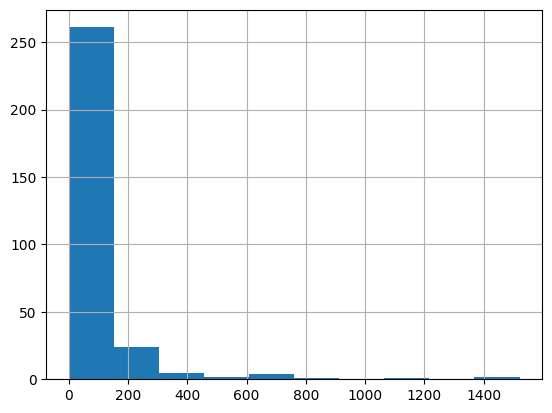

In [183]:
x_1.value_counts()

State_encoded
0       9020
2       3825
23      3435
22      3294
20      3107
        ... 
1434       1
350        1
1430       1
1428       1
2489       1
Name: count, Length: 2490, dtype: int64

In [184]:
x_2.value_counts()

Country_encoded
0      59408
1       9880
4       6306
7       5598
8       3659
       ...  
307        1
141        1
309        1
310        1
465        1
Name: count, Length: 466, dtype: int64

In [185]:
x_3.value_counts()

City_encoded
34       1277
180      1004
25        893
14        883
103       835
         ... 
9193        1
9195        1
9196        1
9197        1
16718       1
Name: count, Length: 16719, dtype: int64

In [226]:
x_all = (x_1+x_2+x_3)
z = (x_all + y_all)

<Axes: >

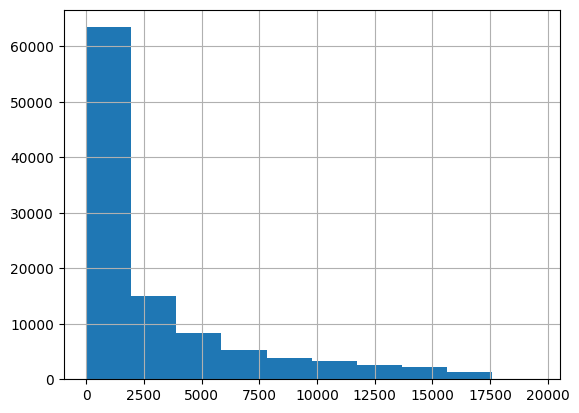

In [227]:
x_all.hist()

<Axes: >

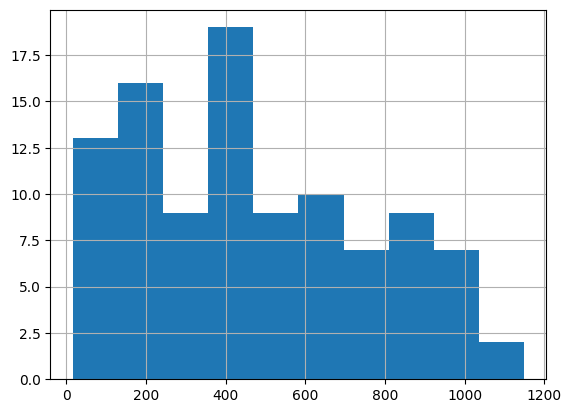

In [239]:
((z.sample(n=300))/300).hist()

In [240]:
len(x)

105283

In [242]:
y.isna().sum()

0

In [244]:
z.isna().sum()

171589

In [248]:
y_all.isna().sum()

0

In [249]:
book_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Title_encoded,Book-Author_encoded,Publisher_encoded
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0,0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,1,1,1
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2,2,2
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,3,3,3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,19469,377,1460
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,242131,102021,140
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,242132,17770,303
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,242133,832,0


In [250]:
user_data

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [251]:
rating_data

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [257]:
merge_data = pd.merge(rating_data,user_data,how='left',on='User-ID')

In [260]:
merge_data = pd.merge(merge_data,book_data,how='left',on='ISBN')

In [261]:
merge_data

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Title_encoded,Book-Author_encoded,Publisher_encoded
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2886.0,2027.0,27.0
1,276726,0155061224,5,"seattle, washington, usa",NaN,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,45524.0,86746.0,5187.0
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,2529.0,192.0,73.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,220494.0,91670.0,372.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,220495.0,30646.0,372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,"cedar park, texas, usa",NaN,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,63748.0,23264.0,678.0
1149776,276706,0679447156,0,"quebec, quebec, canada",18.0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,48482.0,17796.0,31.0
1149777,276709,0515107662,10,"mannington, west virginia, usa",38.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,15084.0,453.0,133.0
1149778,276721,0590442449,10,"providence, rhode island, usa",14.0,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,52321.0,3172.0,24.0


In [262]:

spliting = merge_data['Location'].str.split(pat=',',expand=True)
merge_data['City'] = spliting[0].str.strip()
merge_data['State'] = spliting[1].str.strip()
merge_data['Country'] = spliting[2].str.strip()

merge_data

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Title_encoded,Book-Author_encoded,Publisher_encoded,City,State,Country
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2886.0,2027.0,27.0,tyler,texas,usa
1,276726,0155061224,5,"seattle, washington, usa",NaN,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,45524.0,86746.0,5187.0,seattle,washington,usa
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,2529.0,192.0,73.0,h,new south wales,australia
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,220494.0,91670.0,372.0,rijeka,n/a,croatia
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,220495.0,30646.0,372.0,rijeka,n/a,croatia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,"cedar park, texas, usa",NaN,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,63748.0,23264.0,678.0,cedar park,texas,usa
1149776,276706,0679447156,0,"quebec, quebec, canada",18.0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,48482.0,17796.0,31.0,quebec,quebec,canada
1149777,276709,0515107662,10,"mannington, west virginia, usa",38.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,15084.0,453.0,133.0,mannington,west virginia,usa
1149778,276721,0590442449,10,"providence, rhode island, usa",14.0,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,52321.0,3172.0,24.0,providence,rhode island,usa


In [264]:
unique_strings = merge_data['City'].unique()
merge_encoding = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
merge_data['City_encoded'] = merge_data['City'].map(merge_encoding)

# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = merge_data['State'].unique()
merge_encoding = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
merge_data['State_encoded'] = merge_data['State'].map(merge_encoding)
# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = merge_data['Country'].unique()
merge_encoding = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
merge_data['Country_encoded'] =merge_data['Country'].map(merge_encoding)

# 결과 출력


         User-ID         ISBN  Book-Rating                        Location  \
0         276725   034545104X            0               tyler, texas, usa   
1         276726   0155061224            5        seattle, washington, usa   
2         276727   0446520802            0   h, new south wales, australia   
3         276729   052165615X            3            rijeka, n/a, croatia   
4         276729   0521795028            6            rijeka, n/a, croatia   
...          ...          ...          ...                             ...   
1149775   276704   1563526298            9          cedar park, texas, usa   
1149776   276706   0679447156            0          quebec, quebec, canada   
1149777   276709   0515107662           10  mannington, west virginia, usa   
1149778   276721   0590442449           10   providence, rhode island, usa   
1149779   276723  05162443314            8         san antonio, texas, usa   

          Age                                         Book-Titl

In [266]:
unique_strings = merge_data['Book-Title'].unique()
merge_encoding = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
merge_data['Book-Title_encoded'] =merge_data['Book-Title'].map(merge_encoding)

# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = merge_data['Book-Author'].unique()
merge_encoding = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
merge_data['Book-Author_encoded'] =merge_data['Book-Author'].map(merge_encoding)

# 문자열을 정수로 매핑할 딕셔너리 생성
unique_strings = merge_data['Publisher'].unique()
merge_encoding = {string: idx for idx, string in enumerate(unique_strings)}

# 'A' 열의 문자열을 정수로 인코딩
merge_data['Publisher_encoded'] =merge_data['Publisher'].map(merge_encoding)


In [323]:
merge_encoding_data = merge_data[['Book-Title_encoded','Book-Author_encoded','Publisher_encoded','City_encoded','State_encoded','Country_encoded','User-ID']]

In [273]:
merge_encoding_data_sum=merge_encoding_data.sum(axis=1)

In [329]:
user_unique = merge_encoding_data['User-ID'].unique()

In [326]:
merge_encoding_data

,Book-Title_encoded,Book-Author_encoded,Publisher_encoded,City_encoded,State_encoded,Country_encoded,User-ID
0,0,0,0,0,0,0,276725
1,1,1,1,1,1,0,276726
2,2,2,2,2,2,1,276727
3,3,3,3,3,3,2,276729
4,4,4,3,3,3,2,276729
...,...,...,...,...,...,...,...
1149775,164935,22526,1732,1102,0,0,276704
1149776,6299,3906,359,1475,82,9,276706
1149777,10044,602,265,16718,109,0,276709
1149778,60289,4712,42,710,188,0,276721


In [408]:
(merge_encoding_data['User-ID'].value_counts() <= 4)

User-ID
11676     False
198711    False
153662    False
98391     False
35859     False
          ...  
116180     True
116166     True
116154     True
116137     True
276723     True
Name: count, Length: 105283, dtype: bool

In [411]:
filtered_indices = merge_encoding_data['User-ID'].value_counts() <= 2
filtered_indices = filtered_indices[filtered_indices].index

In [412]:
filtered_indices

Index([266154,  17910, 216004,  17907,  17877, 104863, 104885, 266129, 105480,
       265435,
       ...
       116216, 116191, 116136, 116184, 116182, 116180, 116166, 116154, 116137,
       276723],
      dtype='int64', name='User-ID', length=71668)

In [414]:
filtered_data = merge_encoding_data.drop(merge_encoding_data.index[merge_encoding_data['User-ID'].isin(filtered_indices)])

filtered_data

,Book-Title_encoded,Book-Author_encoded,Publisher_encoded,City_encoded,State_encoded,Country_encoded,User-ID
10,8,8,7,9,7,6,276746
11,9,9,0,9,7,6,276746
12,10,10,8,9,7,6,276746
13,11,10,8,9,7,6,276746
14,12,11,9,9,7,6,276746
...,...,...,...,...,...,...,...
1149771,541,22,20,1102,0,0,276704
1149772,1756,1297,336,1102,0,0,276704
1149773,241071,6163,1073,1102,0,0,276704
1149774,203774,70107,4596,1102,0,0,276704


In [418]:
merge_encoding_data_sum=filtered_data.sum(axis=1)

In [415]:
filtered_data['User-ID'].value_counts()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
80625         3
80644         3
209757        3
80672         3
136762        3
Name: count, Length: 33615, dtype: int64

In [423]:
filtered_data_0 = filtered_data.set_index('User-ID',inplace = True)

In [426]:
merge_encoding_data_sum=filtered_data.sum(axis=1)

In [429]:
np.array(merge_encoding_data_sum.sample())

array([3259])

In [451]:
merge_encoding_data_sum_0 = merge_encoding_data_sum[:-2]

In [453]:
1065608/4

266402.0

In [454]:

random_state = list(range(0,1000))
from tqdm import tqdm
new_list_1 = []
def normtest():
    for i in tqdm(range(100)):
        global new_list_1
        new_list =[]
        X_0, X_1= train_test_split(merge_encoding_data_sum_0, test_size = 0.5, random_state = random_state[i])
        X_0_0, X_0_1 = train_test_split(X_0,test_size = 0.5, random_state = random_state[i])
        X_1_0, X_1_1 = train_test_split(X_1, test_size = 0.5, random_state = random_state[i])
        a_0 = np.array(X_0_0)
        a_1 = np.array(X_0_1)
        a_2 = np.array(X_1_0)
        a_3 = np.array(X_1_1)
        result = np.vstack((a_0, a_1,a_2,a_3))
      
        for j in range(4):
            
            storige = []
            data = result[j]
            for k in range(1000):
                storige.append(sum(np.random.choice(data,size=len(data), replace = True))/len(data))
            n_test = stats.normaltest(storige)
            list_n_test = list(n_test)
            list_n_test.append(j)
            new_list.append(list_n_test)
        new_list_1.append(new_list)
        
        

In [455]:
normtest()

100%|███████████████████████████████████████| 100/100 [1:35:01<00:00, 57.01s/it]


In [481]:
new_list = []
for i in range(100):
    for j in range(3):
        if new_list_1[i][j][1] > 0.5:
            new_list.append(i)


In [482]:
df = pd.DataFrame(new_list_1)
index_list = new_list
import pandas as pd

df = df.drop(index_list)



    

In [488]:

sum_list = []
for i in range(len(df)):
    a = 0
    for j in range(3):
        a += df.iloc[i][j][1]
    sum_list.append(a)
        
        

In [492]:
min(sum_list)

0.06073307591611569

In [493]:
sum_list

[0.6812530570222795,
 1.079804045249832,
 0.5509036094912909,
 0.6393957441079707,
 0.7670646277283849,
 0.06073307591611569,
 1.0892412612809317,
 0.5737145149854649,
 0.7344214857923806]

In [494]:
df

,0,1,2,3
1,"[12.849174206583179, 0.0016212025289418963, 0]","[2.106179715821261, 0.348858159936335, 1]","[2.21264167936149, 0.3307736945570026, 2]","[7.497128744286188, 0.02355153283405207, 3]"
5,"[2.3835433958059786, 0.3036827530713745, 0]","[1.738009996322555, 0.41936861426529715, 1]","[2.0614250324789194, 0.3567526779131605, 2]","[1.9793381315466805, 0.37169967881624666, 3]"
54,"[3.178982047518598, 0.2040294314440981, 0]","[6.3125246850048375, 0.0425846106848836, 1]","[2.379551013442231, 0.3042895673623093, 2]","[2.3363421148036063, 0.3109351039955705, 3]"
61,"[2.7502955952048938, 0.25280222948007747, 0]","[5.410277028151129, 0.06686106200696586, 1]","[2.280541436924878, 0.3197324526209274, 2]","[4.511514005579627, 0.10479418421258108, 3]"
67,"[4.451683139973877, 0.10797651059684384, 0]","[1.437467453359877, 0.48736900776093794, 1]","[3.5237904443205803, 0.17171910937060308, 2]","[0.011446607562276733, 0.9942930431209833, 3]"
79,"[9.562395835430168, 0.00838594727334575, 0]","[7.461303037190769, 0.023977209149097102, 1]","[7.124851735785665, 0.02836991949367284, 2]","[2.0878937726415923, 0.35206238593402445, 3]"
82,"[1.5531170710619615, 0.4599863170287952, 0]","[2.6065667738955285, 0.2716384331276238, 1]","[2.0565881294005215, 0.35761651112451265, 2]","[3.0515304052912993, 0.21745459635290512, 3]"
84,"[3.332453541321766, 0.18895870673803689, 0]","[7.041078442774063, 0.029583478821793577, 1]","[2.0703043445807765, 0.3551723294256344, 2]","[0.05926607723048398, 0.9708017149337416, 3]"
98,"[5.089527307783404, 0.07849160097306737, 0]","[2.2363136902206286, 0.3268817333846807, 1]","[2.2231023639634517, 0.3290481514346326, 2]","[2.680384404945512, 0.26179534603155846, 3]"


In [496]:
seed_number = 79

In [498]:
X_0, X_1= train_test_split(merge_encoding_data_sum_0, test_size = 0.5, random_state = seed_number)
X_0_0, X_0_1 = train_test_split(X_0,test_size = 0.5, random_state = seed_number)
X_1_0, X_1_1 = train_test_split(X_1, test_size = 0.5, random_state = seed_number)

In [505]:
np.array(X_1_1.index)

array([274634,  35859, 264525, ..., 138097,  85433, 127429])

In [510]:
list(X_1_1.index).value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

In [514]:
X_1_1_value = pd.Series(X_1_1.index).value_counts()
X_1_0_value = pd.Series(X_1_0.index).value_counts()
X_0_0_value = pd.Series(X_0_0.index).value_counts()
X_0_1_value = pd.Series(X_0_1.index).value_counts()

In [515]:
duplicate_indexes = X_1_1.index.intersection(X_1_0.index)

In [532]:
new_list = []
duplicate_indexes = X_0_0.index.intersection(X_0_1.index)
new_list.append([len(duplicate_indexes.unique())/len(X_0_1.index.unique()),"0_0","0_1"])
duplicate_indexes = X_0_0.index.intersection(X_1_0.index)
new_list.append([len(duplicate_indexes.unique())/len(X_1_0.index.unique()),"0_0","1_0"])
duplicate_indexes = X_0_0.index.intersection(X_1_1.index)
new_list.append([len(duplicate_indexes.unique())/len(X_1_1.index.unique()),"0_0","1_1"])
duplicate_indexes = X_0_1.index.intersection(X_1_0.index)
new_list.append([len(duplicate_indexes.unique())/len(X_1_0.index.unique()),"0_1","1_0"])
duplicate_indexes = X_0_1.index.intersection(X_1_1.index)
new_list.append([len(duplicate_indexes.unique())/len(X_1_1.index.unique()),"0_1","1_1"])
duplicate_indexes = X_1_0.index.intersection(X_1_1.index)
new_list.append([len(duplicate_indexes.unique())/len(X_1_1.index.unique()),"1_0","1_1"])


In [533]:
new_list

[[0.8334832188208209, '0_0', '0_1'],
 [0.8321152115211521, '0_0', '1_0'],
 [0.8351114014079396, '0_0', '1_1'],
 [0.8351755175517552, '0_1', '1_0'],
 [0.8335873430582771, '0_1', '1_1'],
 [0.834131649611728, '1_0', '1_1']]

In [521]:

X_1_0.index.unique()

Index([208019, 175271,  73331,  46398, 106950, 125031, 154186,  98391, 137589,
       278418,
       ...
        11813,  86619, 122675, 145256,  79019, 232801, 163125, 216847,  84872,
        82657],
      dtype='int64', name='User-ID', length=27775)

In [535]:
storige = []
for k in range(1000):
    storige.append(sum(np.random.choice(merge_encoding_data_sum_0,size=len(merge_encoding_data_sum_0), replace = True))/len(merge_encoding_data_sum_0))
n_test = stats.normaltest(storige)

(array([  4.,  23.,  67., 164., 240., 249., 156.,  72.,  21.,   4.]),
 array([65995.50237423, 66044.56928064, 66093.63618704, 66142.70309345,
        66191.76999985, 66240.83690625, 66289.90381266, 66338.97071906,
        66388.03762547, 66437.10453187, 66486.17143828]),
 <BarContainer object of 10 artists>)

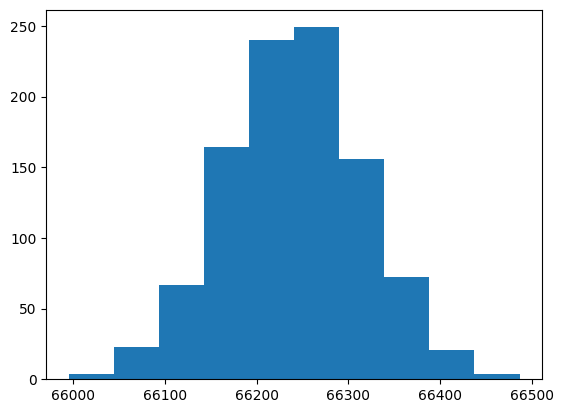

In [538]:
plt.hist(storige)

In [600]:
def NB(User_id):
    a = filtered_data.loc[int(User_id),:]['Book-Author_encoded']
    
    a_unique = a.unique()
    for i in range(len(a_unique)):
        print(f"{User_id}가 읽은 책의 저자:{a_unique[i]}")
        b = filtered_data[filtered_data['Book-Author_encoded'] == a_unique[i]]
        prob = ((pd.DataFrame(a.value_counts()).loc[a_unique[i],:][0])/len(a))/(((pd.DataFrame(a.value_counts()).loc[a_unique[i],:][0])/len(a))+(len(a)/len(b)))
        print(f"위 저자의 책을 읽을 NB확률{prob}")
        
        
        
    
     

In [601]:
NB(276746)

276746가 읽은 책의 저자:8
위 저자의 책을 읽을 NB확률0.991217370090266
276746가 읽은 책의 저자:9
위 저자의 책을 읽을 NB확률0.8493723849372385
276746가 읽은 책의 저자:10
위 저자의 책을 읽을 NB확률0.9858267716535433
276746가 읽은 책의 저자:11
위 저자의 책을 읽을 NB확률0.3571428571428571
276746가 읽은 책의 저자:12
위 저자의 책을 읽을 NB확률0.4929577464788732


In [572]:
a = filtered_data.loc[276746,:]['Book-Author_encoded']

In [585]:
pd.DataFrame(a.value_counts()).loc[a.unique()[1],:][0]

1

In [581]:
a.unique()[1]

9

In [565]:
filtered_data.loc[276746,:]['Book-Author_encoded'].unique()[1]

9

In [567]:
filtered_data[filtered_data['Book-Author_encoded'] == 9]

,Book-Title_encoded,Book-Author_encoded,Publisher_encoded,City_encoded,State_encoded,Country_encoded
User-ID,,,,,,
276746,9,9,0,9,7,6
278026,9,9,0,380,98,0
243,9,9,0,646,92,0
2010,9,9,0,972,25,0
3331,12740,9,0,1211,117,0
...,...,...,...,...,...,...
268315,9,9,0,164,54,0
271284,9,9,0,361,99,0
271538,12740,9,0,361,99,0


(array([ 21.,  62., 139., 228., 253., 176.,  76.,  33.,  10.,   2.]),
 array([64600.86131608, 64692.72922576, 64784.59713545, 64876.46504514,
        64968.33295483, 65060.20086451, 65152.0687742 , 65243.93668389,
        65335.80459357, 65427.67250326, 65519.54041295]),
 <BarContainer object of 10 artists>)

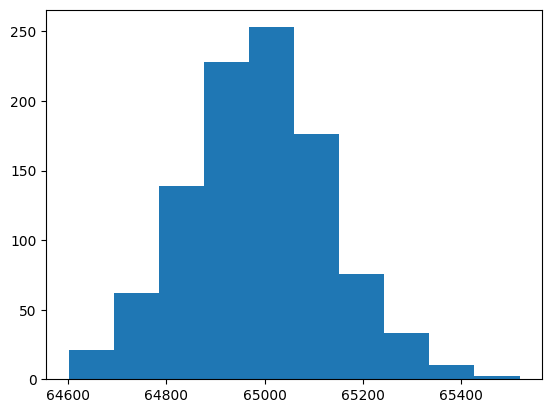

In [441]:
plt.hist(np.array(X_0_0_storige))

In [609]:
import numpy as np

# 평균(mean)과 표준편차(std)를 지정하여 정규 분포를 생성
mean = 0
std = 1
num_samples_1 = 1000  # 생성할 데이터 포인트의 수

# 정규 분포를 따르는 데이터 생성
normal_distribution_data = np.random.normal(mean, std, num_samples)

In [627]:
import numpy as np

# 최솟값(min)과 최댓값(max)을 지정하여 균등 분포를 생성
min_value = 0
max_value = 100
num_samples_2 = 1000  # 생성할 데이터 포인트의 수

# 균등 분포를 따르는 데이터 생성
uniform_distribution_data = np.random.uniform(min_value, max_value, num_samples)


(array([107.,  98., 107., 102., 105.,  97.,  86.,  88., 106., 104.]),
 array([0.0013537 , 0.10115597, 0.20095823, 0.3007605 , 0.40056276,
        0.50036503, 0.60016729, 0.69996956, 0.79977182, 0.89957409,
        0.99937635]),
 <BarContainer object of 10 artists>)

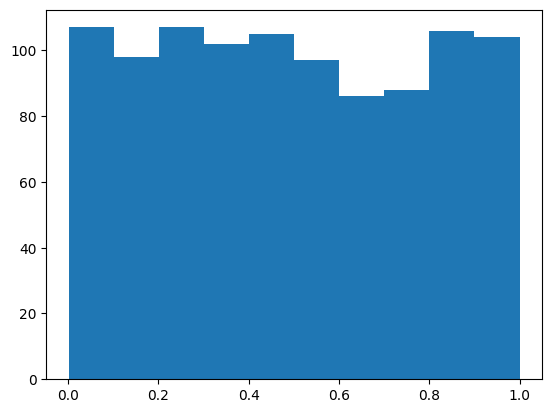

In [608]:
plt.hist(uniform_distribution_data)

In [611]:
num_samples_1

1000

In [616]:
normal_distribution_data.choice(replace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'choice'

In [ ]:
np.random.choice(normal_distribution)

In [642]:
sum_list = []
sum_nu = 0
for i in range(10000):
    uniform_distribution_data = np.random.uniform(min_value, max_value, num_samples)
    sum_list.append(sum(uniform_distribution_data)/1000)
    normal_distribution_data = np.random.normal(mean, std, num_samples)
    sum_list.append(sum(uniform_distribution_data)/1000)


(array([  90.,  450., 1628., 4000., 5328., 4834., 2606.,  846.,  188.,
          30.]),
 array([46.91221041, 47.56797398, 48.22373755, 48.87950113, 49.5352647 ,
        50.19102827, 50.84679185, 51.50255542, 52.15831899, 52.81408257,
        53.46984614]),
 <BarContainer object of 10 artists>)

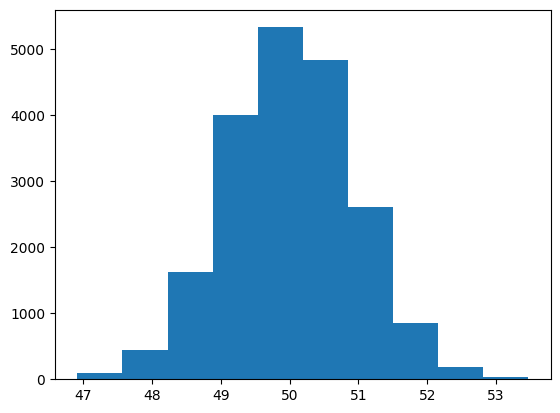

In [643]:
plt.hist(sum_list)